#### Giovanni Gamaliel López Padilla
#### Tarea 04
#### Procesamiento de lenguaje natural

##### Problema 1

Programa y visualiza TCOR. Puede hacer esto de forma similar a como el profesor lo
hizo en la Práctica 4 con DOR. El pesado puede ser el que el profesor sugirió en clase o
PPMI como lo sugiere Dan Jurafsky; hacer al menos dos gráficas, la de constelación de
palabras y subconjunto para ver algunas palabras con flechas.

In [1]:
from Modules.functions import load_data, obatin_reduced_matrix, obtain_best_features, obtain_target_matrix
from Modules.graphics import create_constellation, create_centroid
from Modules.datasets import obtain_parameters
from Modules.dictionaries import dictionaries
from Modules.vocabulary import vocabularies
from Modules.DTR import build_TCOR
from Modules.bows import BoW

parameters = obtain_parameters()
vocabulary = vocabularies()
dictionary = dictionaries()
bows = BoW()

/home/giovanni/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/giovanni/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


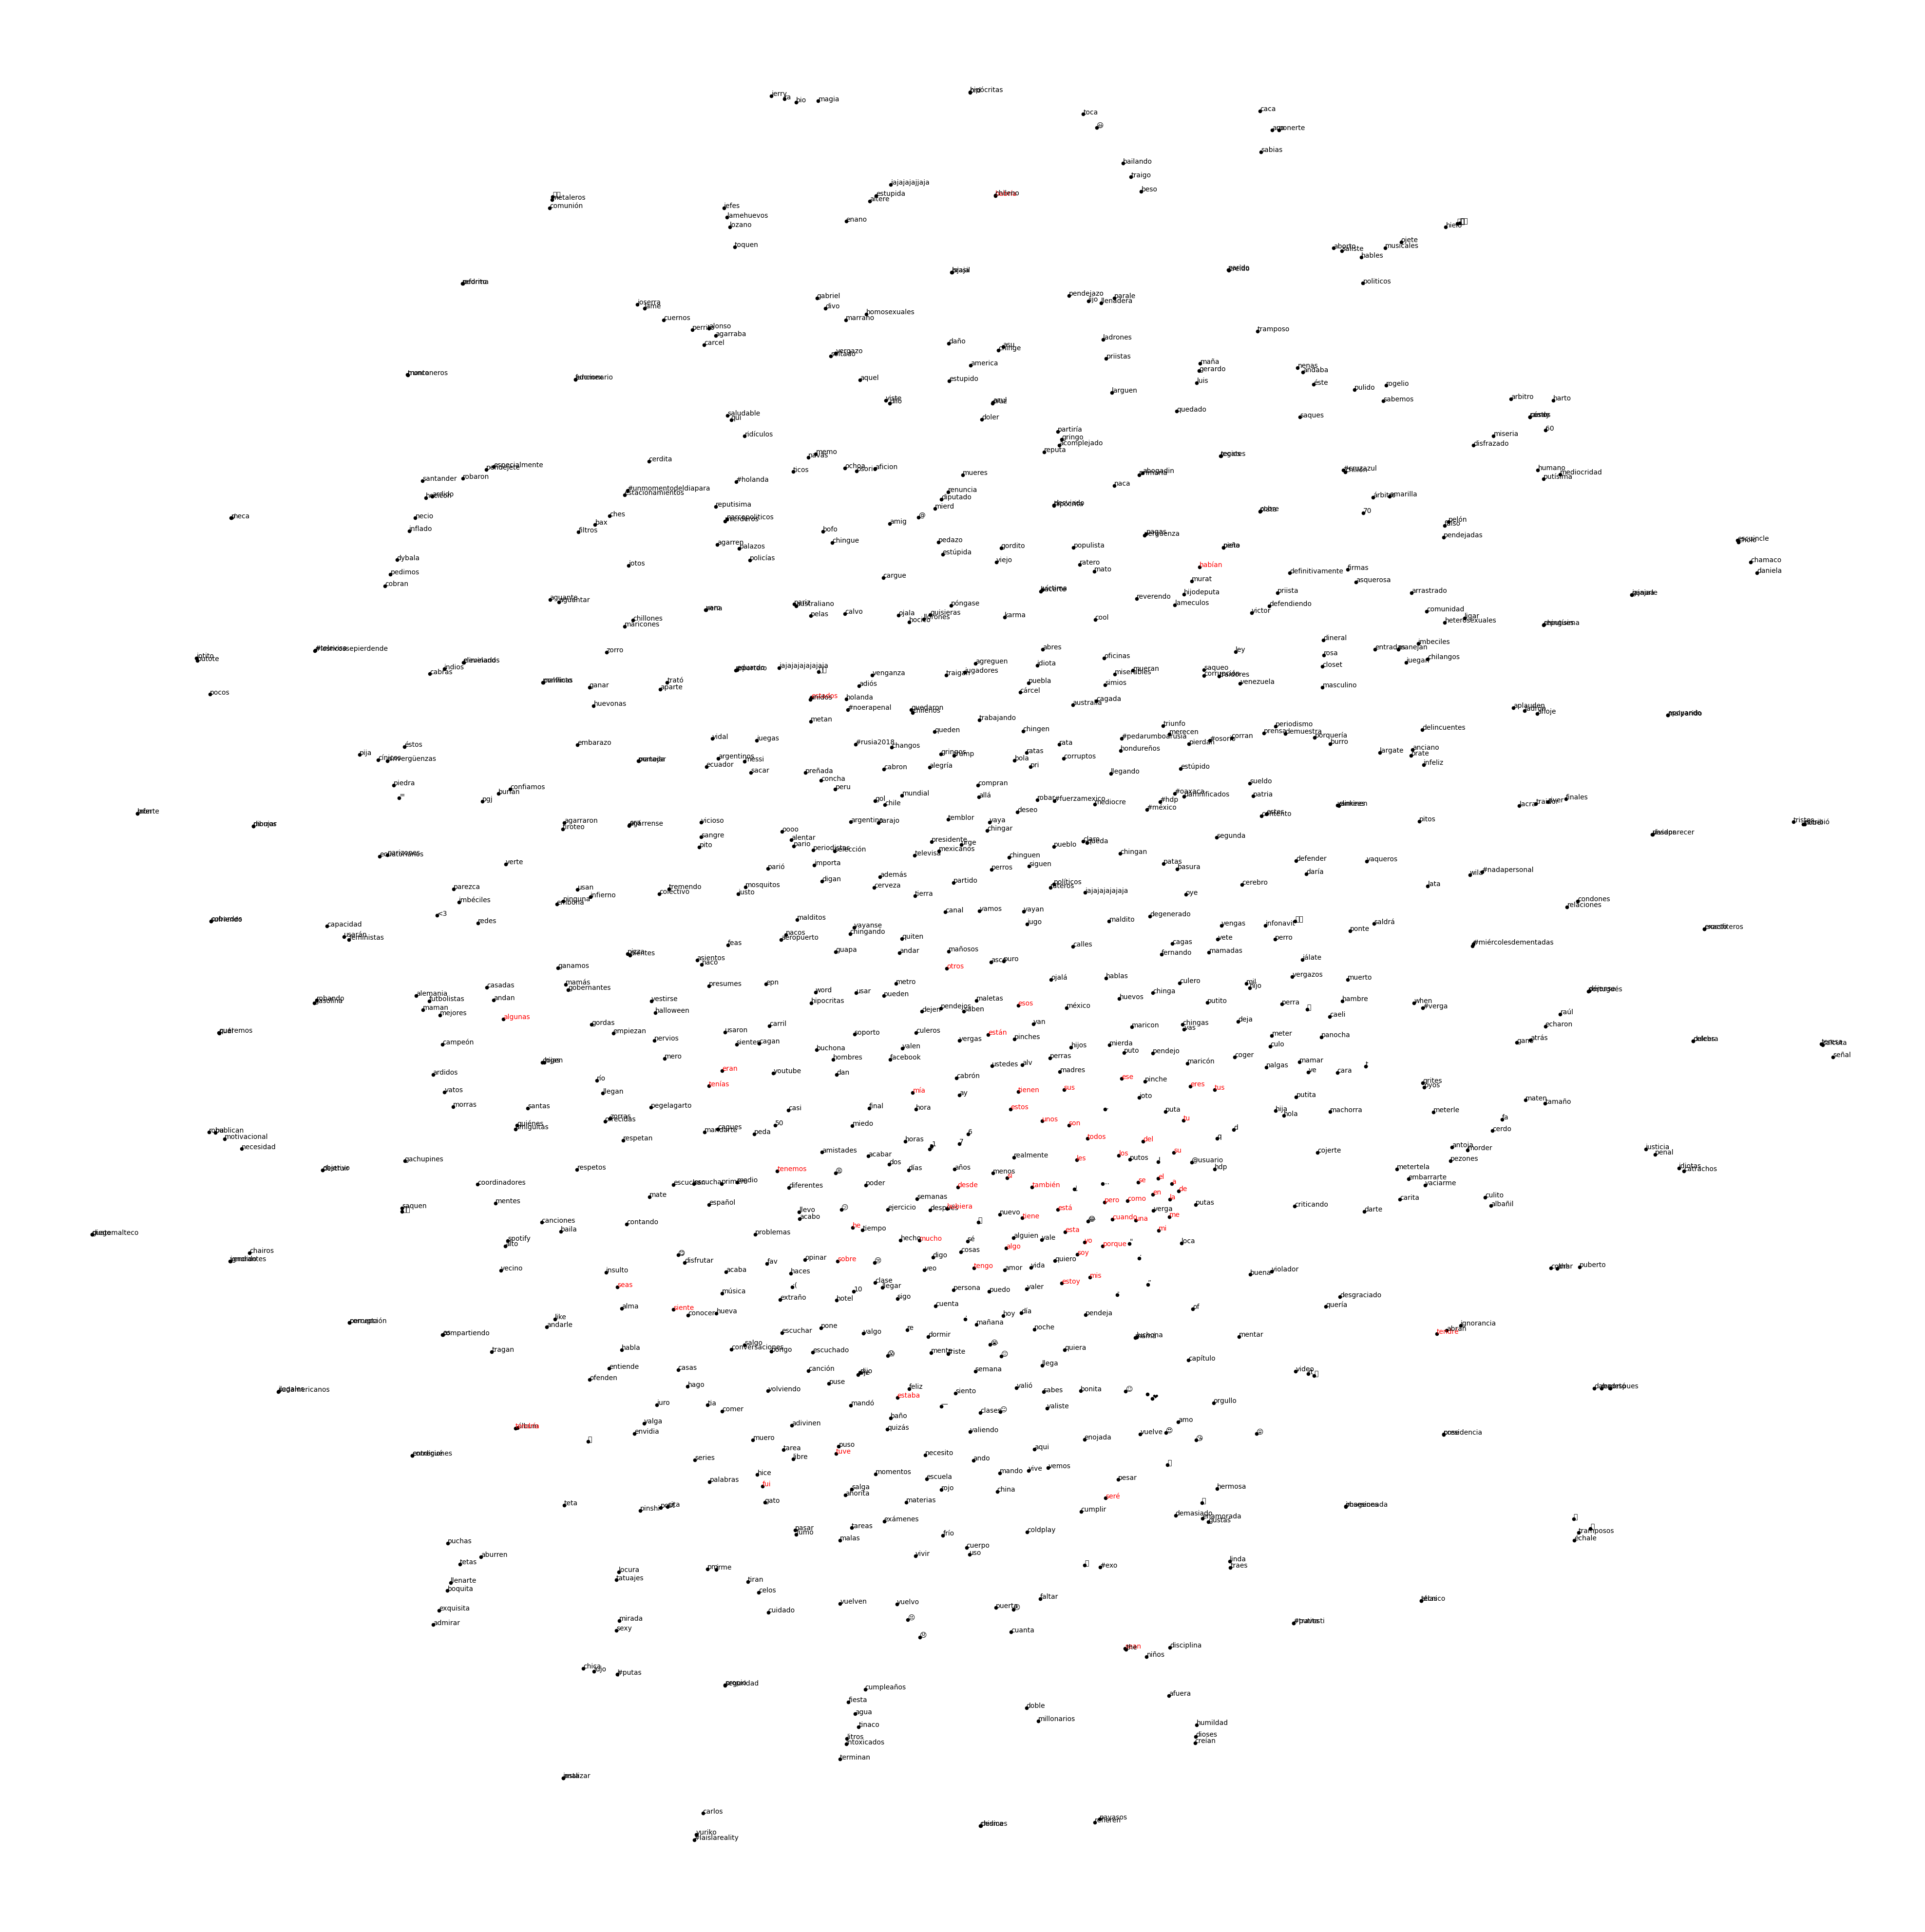

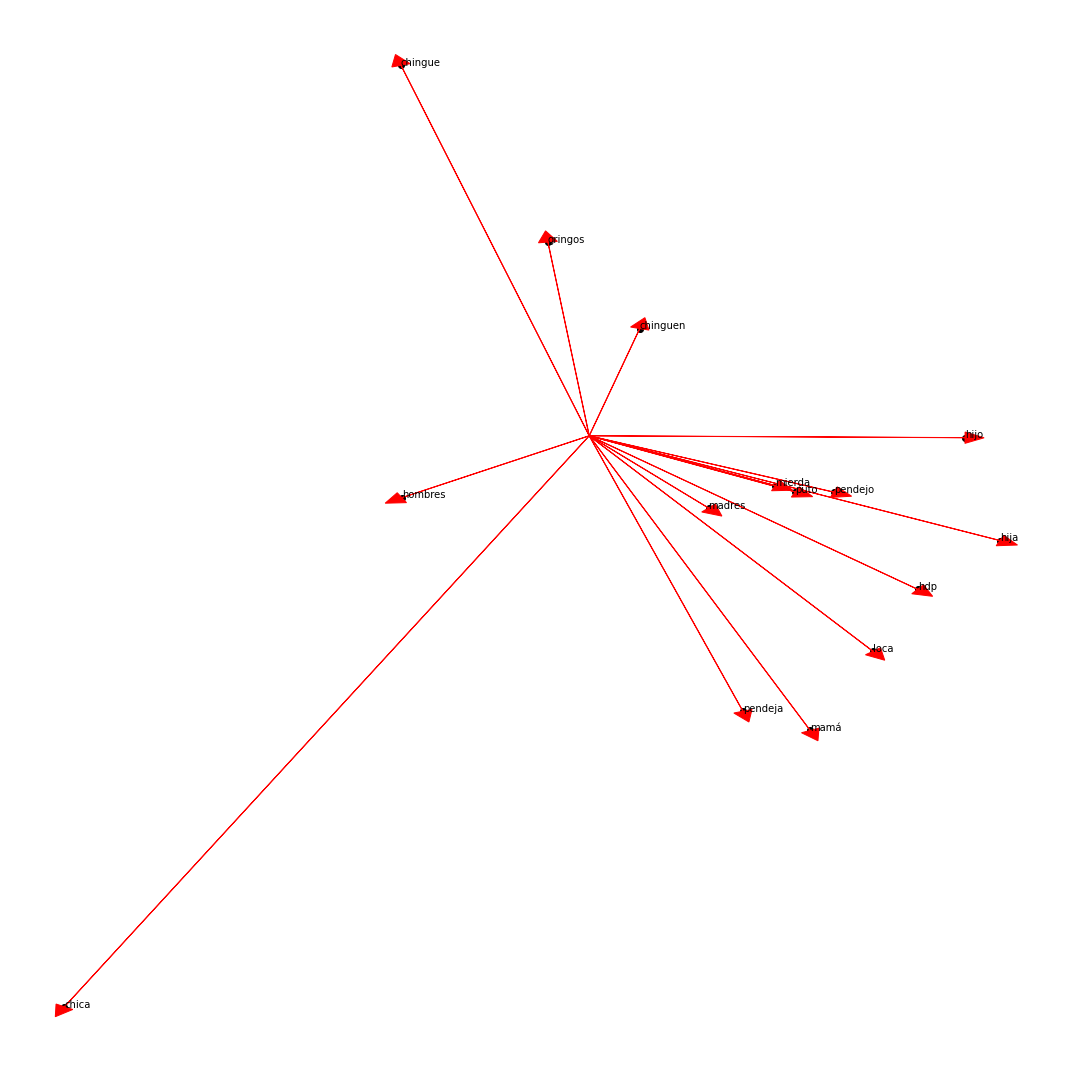

In [2]:
data_tr, labels_tr, data_val, labels_val = load_data(parameters)
vocabulary = vocabulary.obtain(data_tr, parameters["max words"])
index_word = dictionary.build_of_index(vocabulary)
bow_binary = bows.build_binary(data_tr, vocabulary, index_word)
tcor = build_TCOR(
    data_tr,
    vocabulary,
    index_word,
)
best_features = obtain_best_features(
    bow_binary,
    labels_tr,
)
target_words, target_matrix = obtain_target_matrix(
    index_word,
    tcor,
    best_features,
)
reduced_matrix = obatin_reduced_matrix(target_matrix)
create_constellation(
    reduced_matrix,
    target_words,
    parameters,
    show=True,
)
create_centroid(
    reduced_matrix,
    target_words,
    parameters,
    show=True,
)

##### Problema 2

Programa y visualiza alguna implementación de Random Indexing. Puedes hacer esto
de forma similar a como el profesor lo hizo en la Práctica 4 con DOR. Hacer al menos
dos gráficas, la de constelación de palabras y subconjunto para ver algunas palabras con
flechas.

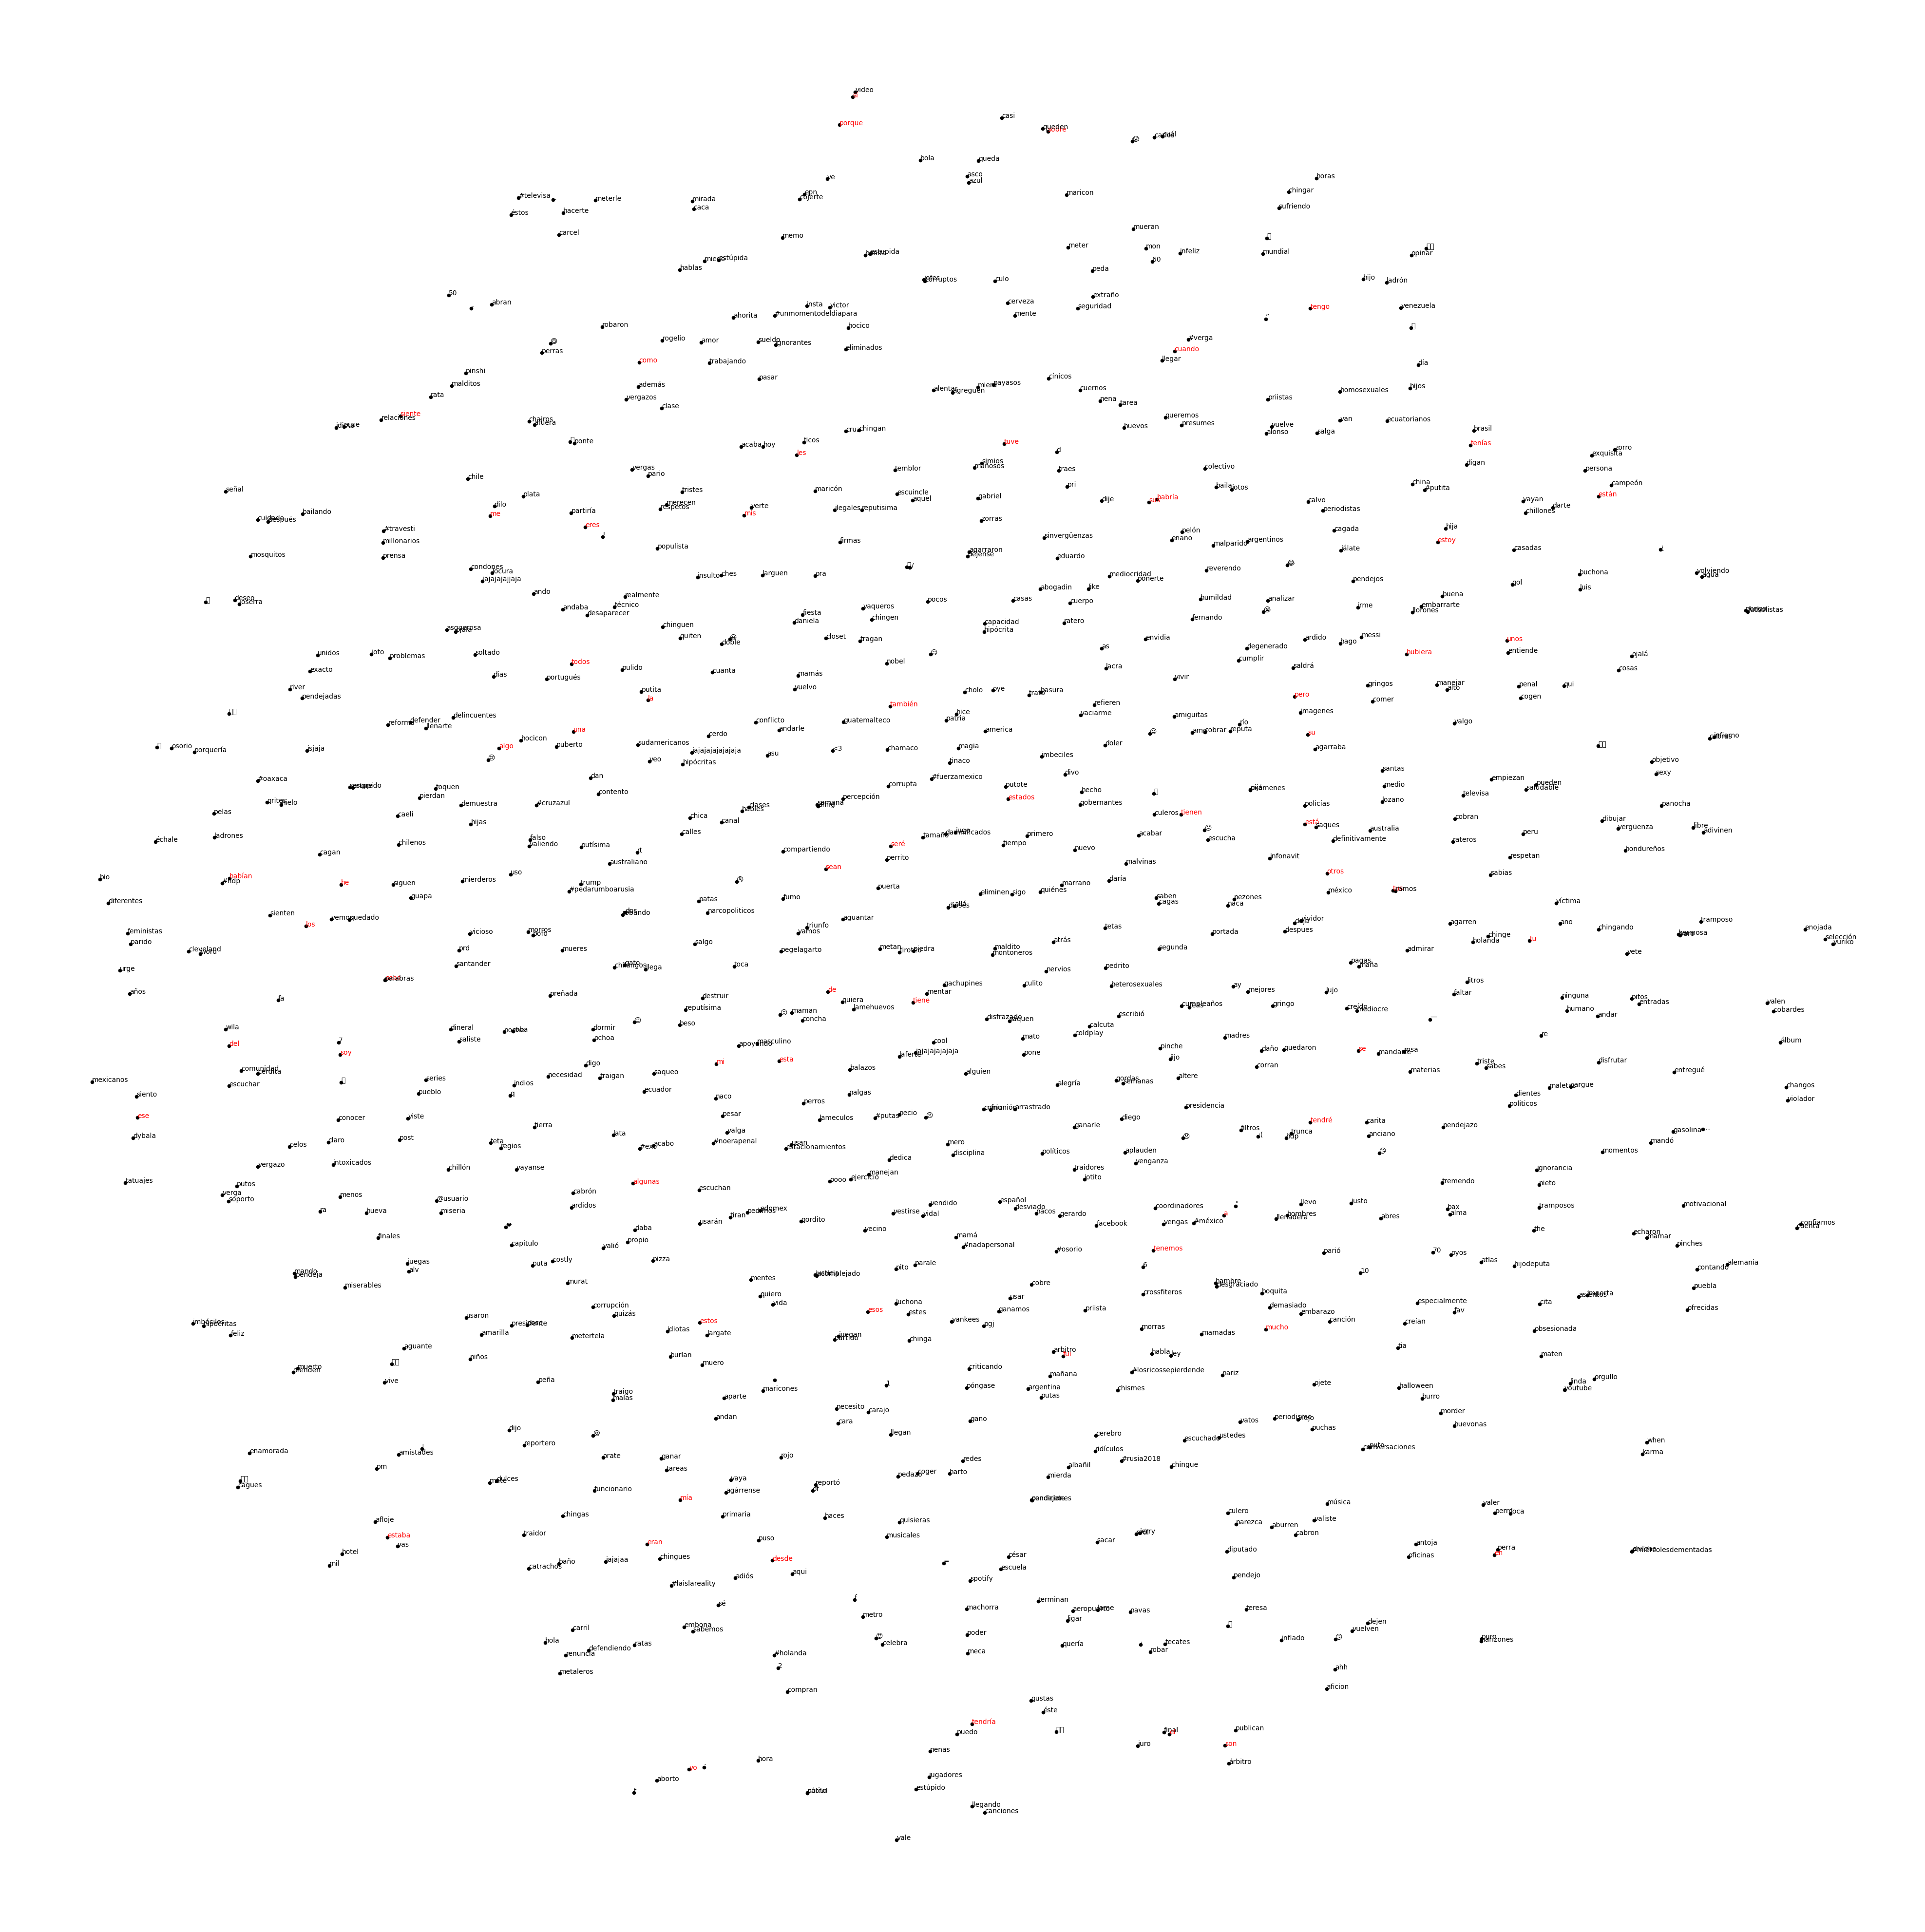

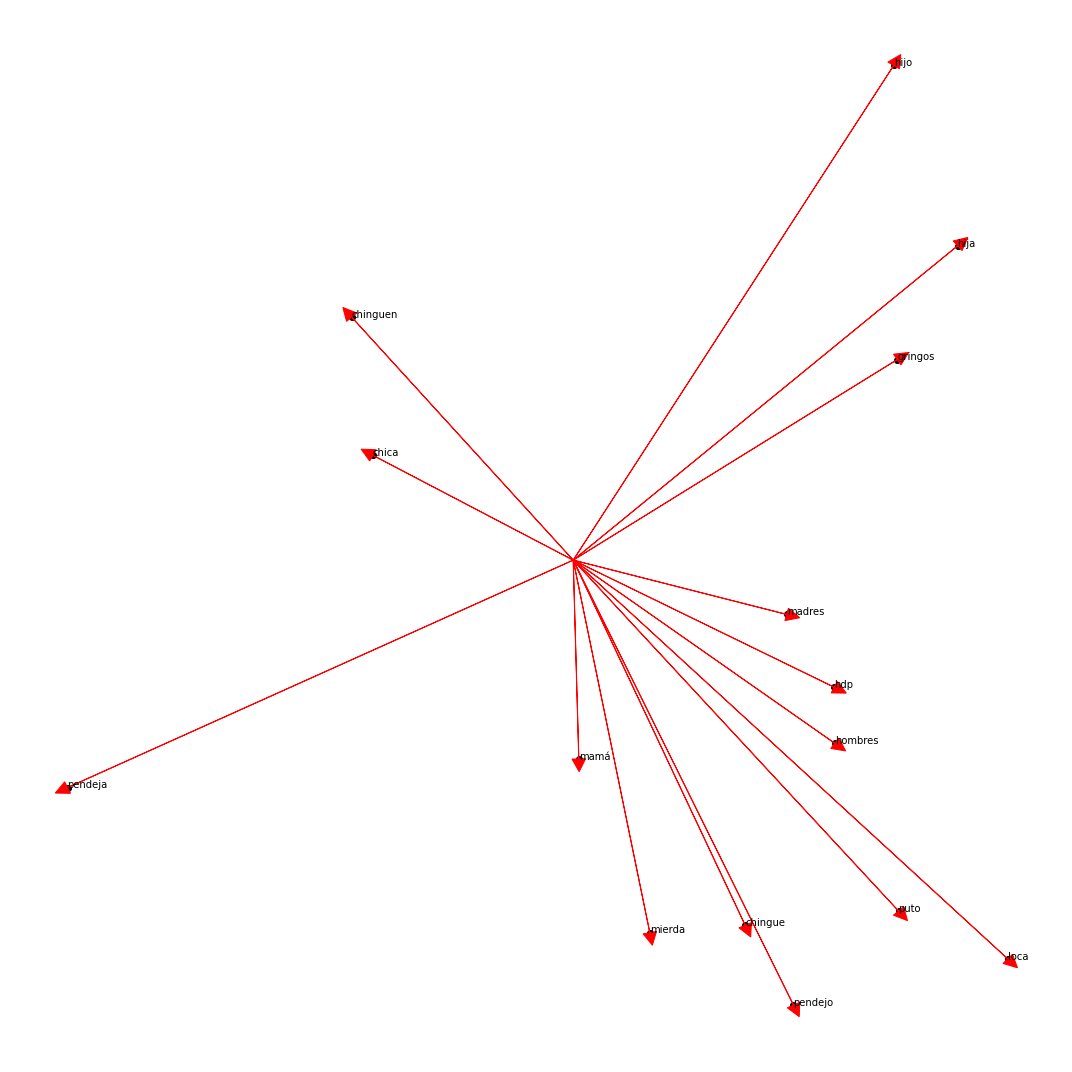

In [3]:
from Modules.DTR import build_DOR, random_indexing

dor = build_DOR(bow_binary)
random_index = random_indexing(
    data_tr,
    index_word,
    50,
)
best_features = obtain_best_features(
    bow_binary,
    labels_tr,
)
target_words, target_matrix = obtain_target_matrix(
    index_word,
    random_index,
    best_features,
)
reduced_matrix = obatin_reduced_matrix(target_matrix)
create_constellation(
    reduced_matrix,
    target_words,
    parameters,
)
create_centroid(
    reduced_matrix,
    target_words,
    parameters,
)

#### Problema 3

Use alguna de las DTRs anteriores por separado de alguna forma para clasificación de
documentos (e.g., promedio de vectores de términos en cada documento para representar).
Compárelas contra un BoW-TFIDF de 5000 palabras más frecuentes.

In [4]:
from Modules.functions import print_results
from Modules.DTR import tcor_to_BoW
from Modules.models import SVM_model

model = SVM_model()
results = []
tcor_tr = build_TCOR(
    data_tr,
    vocabulary,
    index_word,
)
bow_tr = tcor_to_BoW(
    data_tr,
    vocabulary,
    index_word,
    tcor_tr,
)
del tcor_tr
tcor_val = build_TCOR(
    data_val,
    vocabulary,
    index_word,
)
bow_val = tcor_to_BoW(
    data_val,
    vocabulary,
    index_word,
    tcor_val,
)
del tcor_val
grid = model.create_model(
    bow_tr,
    labels_tr,
)
result = model.evaluate_model(
    bow_val,
    labels_val,
    grid,
    "TCOR",
)
results += [result]
del grid
bow_tr = bows.build_tfidf(
    data_tr,
    vocabulary,
    index_word,
)
bow_val = bows.build_tfidf(
    data_val,
    vocabulary,
    index_word,
)
grid = model.create_model(
    bow_tr,
    labels_tr,
)
result = model.evaluate_model(
    bow_val,
    labels_val,
    grid,
    "TFIDF",
)
results += [result]
print_results(results)

Algoritmo      Precision    Recall    F1 Score
-----------  -----------  --------  ----------
TCOR            0.732149  0.752976    0.729895
TFIDF           0.783956  0.795165    0.788376


#### Problema 4

Bajo la representación TCOR de los términos, y asumiendo un vocabulario de 5000
palabras, muestre por orden de mayor similitud coseno (ver chp 6 del libro de Dan) los
10 pares de palabras más parecidas en toda la colección.

In [5]:
from Modules.DTR import obtain_cosine_similitud, write_top_similitud_words

distances = obtain_cosine_similitud(tcor)
word_index = dictionary.obtain_invert_dictionary(index_word)
write_top_similitud_words(
    distances,
    word_index,
    parameters,
    show=True,
)

  Posición    Angulo  Palabra 1    Palabra 2
----------  --------  -----------  -----------
         1         1  »            «
         2         1  beyond       bangtan
         3         1  conducta     cdo
         4         1  contratos    cdo
         5         1  contratos    conducta
         6         1  diciéndoles  bangtan
         7         1  diciéndoles  beyond
         8         1  laburo       cdo
         9         1  laburo       conducta
        10         1  laburo       contratos


#### Problema 5

Bajo la representación BoW-TFIDF de los documentos, y asumiendo un vocabulario de
5000 palabras, muestre en por orden de más similitud coseno (ver chp 6 del libro de Dan)
los 10 pares de documentos más parecidos en toda la colección. Muestre el texto que
contienen y muestre la categoría de cada uno.

In [6]:
from Modules.DTR import write_top_similitud_documents

bow = bows.build_tfidf(
    data_tr,
    vocabulary,
    index_word,
)
distances = obtain_cosine_similitud(bow)
write_top_similitud_documents(
    distances,
    data_tr,
    parameters,
    show=True,
)

  Posición    Angulo  Documento 1                                                                                                                                                               Documento 2
----------  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------------------------------------------------------------------
         1  1         una flaquita tetona recibe su dotación mientras chupa otra verga! ¡mira su cara de placer! rt para más vídeos                                                             una flaquita tetona recibe su dotación mientras chupa otra verga! ¡mira su cara de placer!  rt para más vídeos
         2  0.985483  su mejor amigo va a ser su mejor amigo y les jugará lealtad eterna hasta que llegue su novia la loca y diga lo contrario.  😑😐 #0pedosmorra

#### Problema 6

Implemente Ganancia de Información o Chi2 como lo sugiere Baeza-Yates (no función
de sklearn ni similar) para descubrir el top 50 de las palabras más relevantes de TODA la colección. Haga una gráfica también con la herramienta de word_cloud: https://amueller.github.io/word_cloud/

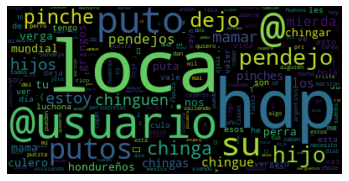

Palabra       Gain information
----------  ------------------
loca                0.0370148
hdp                 0.0323858
@usuario            0.0222496
@                   0.0217465
puto                0.021634
su                  0.0180129
putos               0.0146195
pendejo             0.014313
hijo                0.0137598
dejo                0.0130083
pinche              0.0108825
chinga              0.0103514
hijos               0.00792183
estoy               0.00764374
mamar               0.00738355
chinguen            0.00718058
pendejos            0.00640796
mierda              0.00622873
chingue             0.00572008
los                 0.00560035
pinches             0.00505371
chingas             0.00498407
hondureños          0.00438826
tu                  0.00433555
chingar             0.00406041
verga               0.00389048
…                   0.00381432
puta                0.00358943
nos                 0.00358254
❤                   0.00357368
mundial             0.

In [7]:
from Modules.functions import obtain_information_gain, print_tuple_as_table
from Modules.graphics import create_wordcloud

ig = obtain_information_gain(
    data_tr,
    labels_tr,
    data_val,
    labels_val,
    index_word,
)
create_wordcloud(
    ig,
    parameters,
    show=True,
)
ig = dictionary.sort_dict(ig)
print_tuple_as_table(ig, 50)